In [159]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # Adjusts the configuartion of the plots we will make


# Read in the data
df = pd.read_csv(r'/Users/russellmubaya/Desktop/topCarsSales-v2.csv')

In [131]:
df

,id,date,car,seat_color,car_color,value (US$ mi),value off (US$ mi),discount (%),total (US$ mi),salesperson,city,country
0,1,2017-1-4,Ferrari Pininfarina Sergio,brown,blue,2.315250,2.290760,3,2.222037,Sophia,sao paulo,brazil
1,2,2017-1-16,McLaren P1 LM,red,black,2.719500,2.686197,1,2.659335,Sophia,sao paulo,brazil
2,3,2017-1-12,Ferrari Pininfarina Sergio,black,silver,2.205000,2.184845,1,2.162997,Helena,sao paulo,brazil
3,4,2017-1-9,Bugatti Chiron,brown,gold,2.238075,2.211546,2,2.167315,Sophia,sao paulo,brazil
4,5,2017-1-10,Bugatti La Voiture Noire,black,white,13.351800,13.151793,1,13.020275,Manuela,sao paulo,brazil
...,...,...,...,...,...,...,...,...,...,...,...,...
3142,3143,2020-10-15,McLaren P1 LM,white,gold,3.764565,3.708973,2,3.634793,Soraia,riad,Saudi Arabia
3143,3144,2020-10-20,Bugatti Chiron,white,gold,2.950605,2.917426,1,2.888252,Fatima,riad,Saudi Arabia
3144,3145,2020-10-3,Bugatti Chiron,brown,blue,3.037387,2.990502,2,2.930692,Isa,riad,Saudi Arabia
3145,3146,2020-10-8,W Motors Lykan Hypersport,brown,silver,3.561075,3.519505,2,3.449115,Soraia,riad,Saudi Arabia


Now that we have our database, we can now refine it a little bit, starting by renaming the columns because dollar signs and spaces between words make coding difficult. 

In [250]:
df.rename(columns= {'value (US$ mi)': 'value_US', 'value off (US$ mi)': 'value_off_US', 'discount (%)': 'percent_discount', 'total (US$ mi)': 'total_US'}, inplace = True)  
df

,id,date,car,seat_color,car_color,value_US,value_off_US,percent_discount,total_US,salesperson,city,country
0,1,2017-1-4,Ferrari Pininfarina Sergio,brown,blue,2.315250,2.290760,3,2.222037,Sophia,sao paulo,brazil
1,2,2017-1-16,McLaren P1 LM,red,black,2.719500,2.686197,1,2.659335,Sophia,sao paulo,brazil
2,3,2017-1-12,Ferrari Pininfarina Sergio,black,silver,2.205000,2.184845,1,2.162997,Helena,sao paulo,brazil
3,4,2017-1-9,Bugatti Chiron,brown,gold,2.238075,2.211546,2,2.167315,Sophia,sao paulo,brazil
4,5,2017-1-10,Bugatti La Voiture Noire,black,white,13.351800,13.151793,1,13.020275,Manuela,sao paulo,brazil
...,...,...,...,...,...,...,...,...,...,...,...,...
3142,3143,2020-10-15,McLaren P1 LM,white,gold,3.764565,3.708973,2,3.634793,Soraia,riad,Saudi Arabia
3143,3144,2020-10-20,Bugatti Chiron,white,gold,2.950605,2.917426,1,2.888252,Fatima,riad,Saudi Arabia
3144,3145,2020-10-3,Bugatti Chiron,brown,blue,3.037387,2.990502,2,2.930692,Isa,riad,Saudi Arabia
3145,3146,2020-10-8,W Motors Lykan Hypersport,brown,silver,3.561075,3.519505,2,3.449115,Soraia,riad,Saudi Arabia


Following this, it's a good idea to remove data that isn't interesting or relevant. 

In [251]:
df.drop(columns=['city', 'value_off_US', 'value_US', 'seat_color', 'id', 'percent_discount'])
df

,id,date,car,seat_color,car_color,value_US,value_off_US,percent_discount,total_US,salesperson,city,country
0,1,2017-1-4,Ferrari Pininfarina Sergio,brown,blue,2.315250,2.290760,3,2.222037,Sophia,sao paulo,brazil
1,2,2017-1-16,McLaren P1 LM,red,black,2.719500,2.686197,1,2.659335,Sophia,sao paulo,brazil
2,3,2017-1-12,Ferrari Pininfarina Sergio,black,silver,2.205000,2.184845,1,2.162997,Helena,sao paulo,brazil
3,4,2017-1-9,Bugatti Chiron,brown,gold,2.238075,2.211546,2,2.167315,Sophia,sao paulo,brazil
4,5,2017-1-10,Bugatti La Voiture Noire,black,white,13.351800,13.151793,1,13.020275,Manuela,sao paulo,brazil
...,...,...,...,...,...,...,...,...,...,...,...,...
3142,3143,2020-10-15,McLaren P1 LM,white,gold,3.764565,3.708973,2,3.634793,Soraia,riad,Saudi Arabia
3143,3144,2020-10-20,Bugatti Chiron,white,gold,2.950605,2.917426,1,2.888252,Fatima,riad,Saudi Arabia
3144,3145,2020-10-3,Bugatti Chiron,brown,blue,3.037387,2.990502,2,2.930692,Isa,riad,Saudi Arabia
3145,3146,2020-10-8,W Motors Lykan Hypersport,brown,silver,3.561075,3.519505,2,3.449115,Soraia,riad,Saudi Arabia


Now we can get down to the analysis and cleaning of data as we please. Here I found it interesting to see what the combined amount of money spent on individual high grade cars form 2017 to 2021 was. So I proceeded to group the values. After grouping I think it's good practise to sort them in descending order.

In [254]:
car_brands_df = df.groupby('car')[[ 'total_US']].sum()
car_brand_df = car_brands_df.sort_values('total_US', ascending = False)
car_brand_df

,total_US
car,
Bugatti La Voiture Noire,5534.709001
Rolls-Royce Sweptail,3667.318682
Lamborghini Veneno Roadster,1274.551259
Koenigsegg CCXR Trevita,1274.210507
McLaren P1 LM,1158.096359
W Motors Lykan Hypersport,997.330198
Aston Martin Valkyrie,936.736248
Bugatti Veyron by Mansory Vivere,924.649481
Ferrari Pininfarina Sergio,834.984365


As we can see from the table, the Bugatti La Voiture Noire strikes many big spenders' interests for reasons that can be researched further through surveys. This rank, although informative, may not suffice to investers looking to understand where their production time could be better spent and so, some depictions should be made for greater emphasis.

I proceed to plot a line graph represinting these values in this regards.

Text(0, 0.5, 'US$ million')

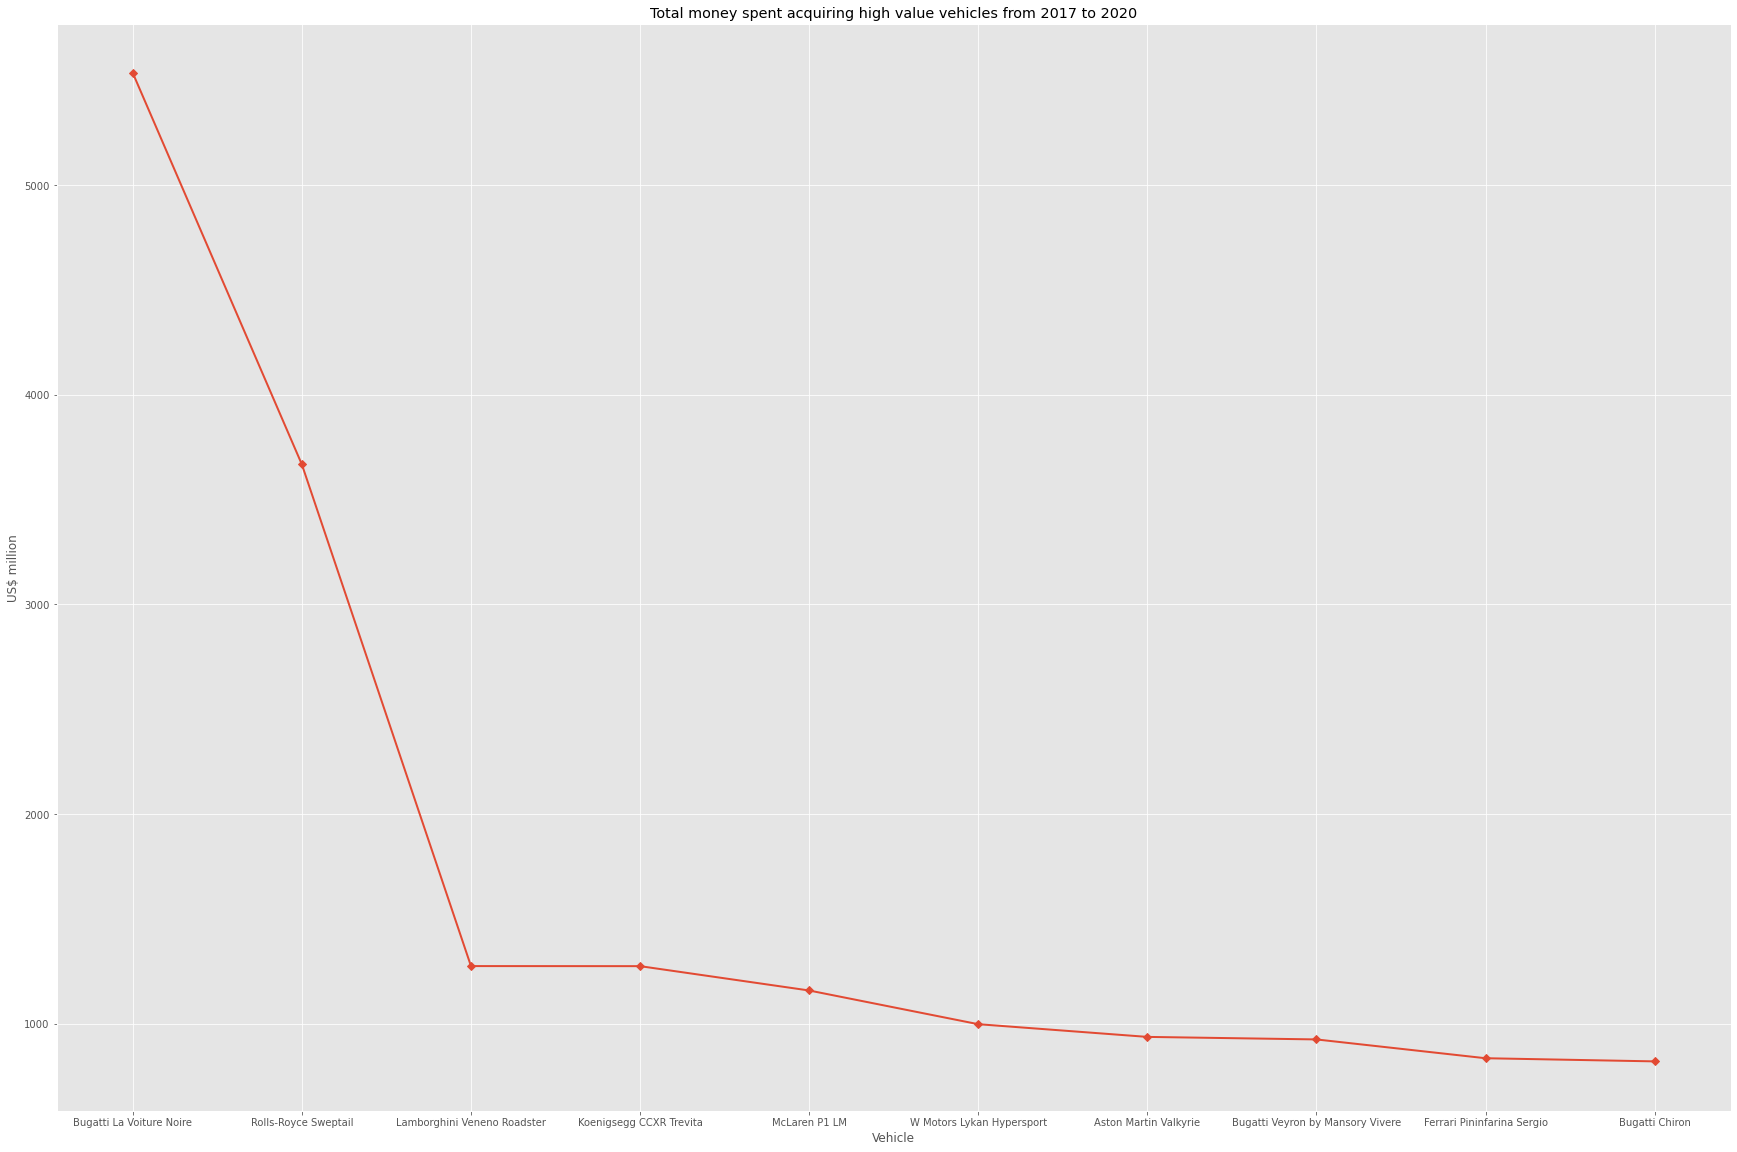

In [269]:
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (30,20) # Adjusts the configuartion of the graph we are making we will make

plt.plot(car_brand_df.index, car_brand_df.total_US, linestyle = 'solid', linewidth = 2, marker = 'D')
plt.title('Total money spent acquiring high value vehicles from 2017 to 2020')
plt.xlabel('Vehicle')
plt.ylabel('US$ million')


After having plotted this graph, we can compile more data information to learn more about the these car top car sales. I personally would like to know which countries had buyers who spent the most funds on theses cars. To do this, I simply follow suit, taking similar same steps to those above.

In [272]:
country_stats_df = df.groupby('country')[['total_US']].sum()
country_stat_df = country_stats_df.sort_values('total_US', ascending = False)
country_stat_df

,total_US
country,
portugal,3309.818621
Saudi Arabia,3278.785513
brazil,3003.062284
united state,2791.493283
canada,2561.257326
japan,2478.102630


This comes of as a surprise because I least expected Portugal to have individuals prepared to pay over $ 50 Million than Saudi Arabians who are synonymous with wealth knowadays. On top of this, first world countries likes the United States, Canada and Japan were surpassed by Brazil that is very much not the hub of wealth.

We can represent this as well in a graph. Preferably a bar graph.


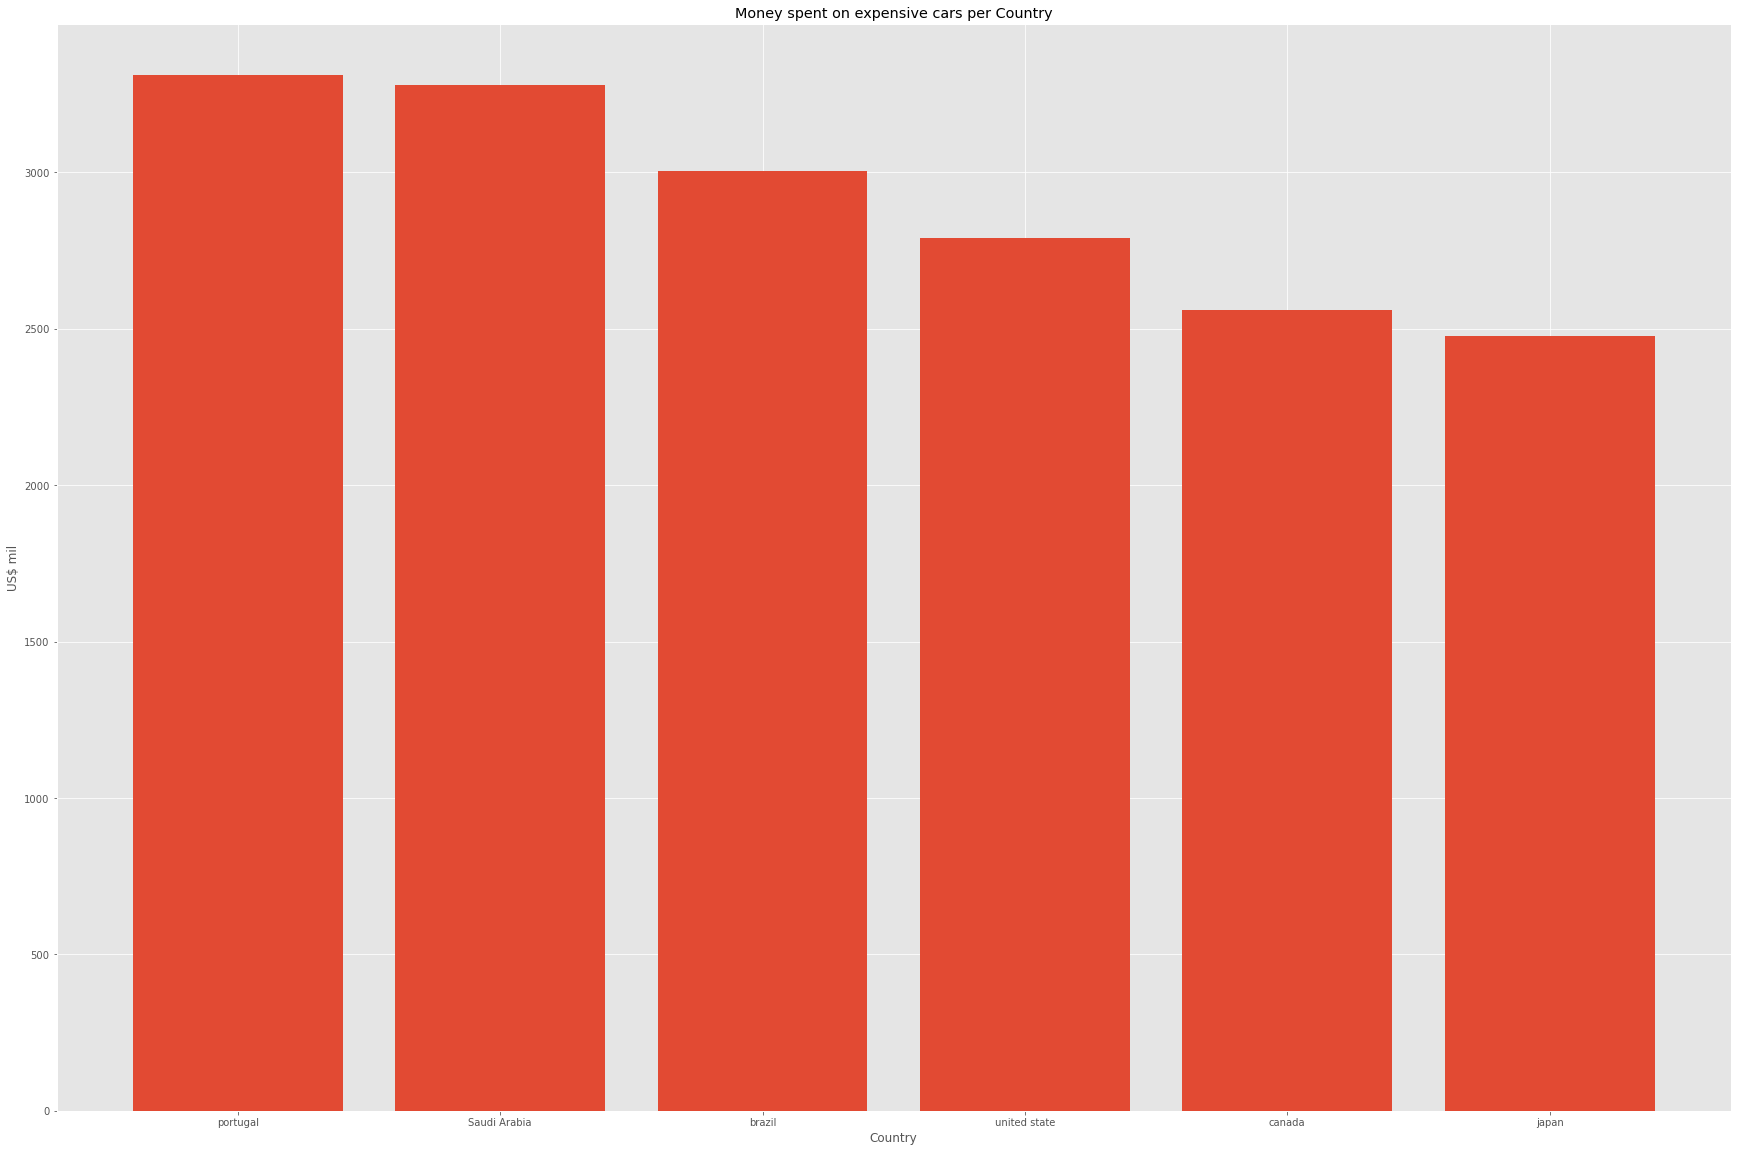

In [273]:
cs_df = country_stats_df.sort_values('total_US', ascending = False)
plt.bar(cs_df.index, cs_df.total_US)
plt.title('Money spent on expensive cars per Country')
plt.xlabel('Country')
plt.ylabel('US$ mil') 

plt.show()

The graph illustrates the relationship of those purchases made by inhabitants in those respective countries. Comparisons can be made with ease surrounding this work. 

Next up is the sales people's results, accessing how much they sold in referance to other sellers in the same market. Due to fact, that there are over ten employees that fit this bill, i narrowed it down to those that closed off transactions worth more than $400 Mil in car sales.

In [275]:
salesperson_performance_df = df.groupby('salesperson')[['total_US']].sum()
sp = salesperson_performance_df.total_US > 400
s = salesperson_performance_df[sp]
sales = s.sort_values('total_US', ascending = False)
sales

,total_US
salesperson,
Nicolas,875.147773
Isaac,640.854148
Henrique,636.382460
Rafael,613.818177
Joaquim,543.616063
Nadia,528.428972
Fatima,521.448552
Helena,468.949382
Heloísa,452.232523


As always, it's beneficial to represent this data in some sort of chart, and I found it best it be a bar graph too.


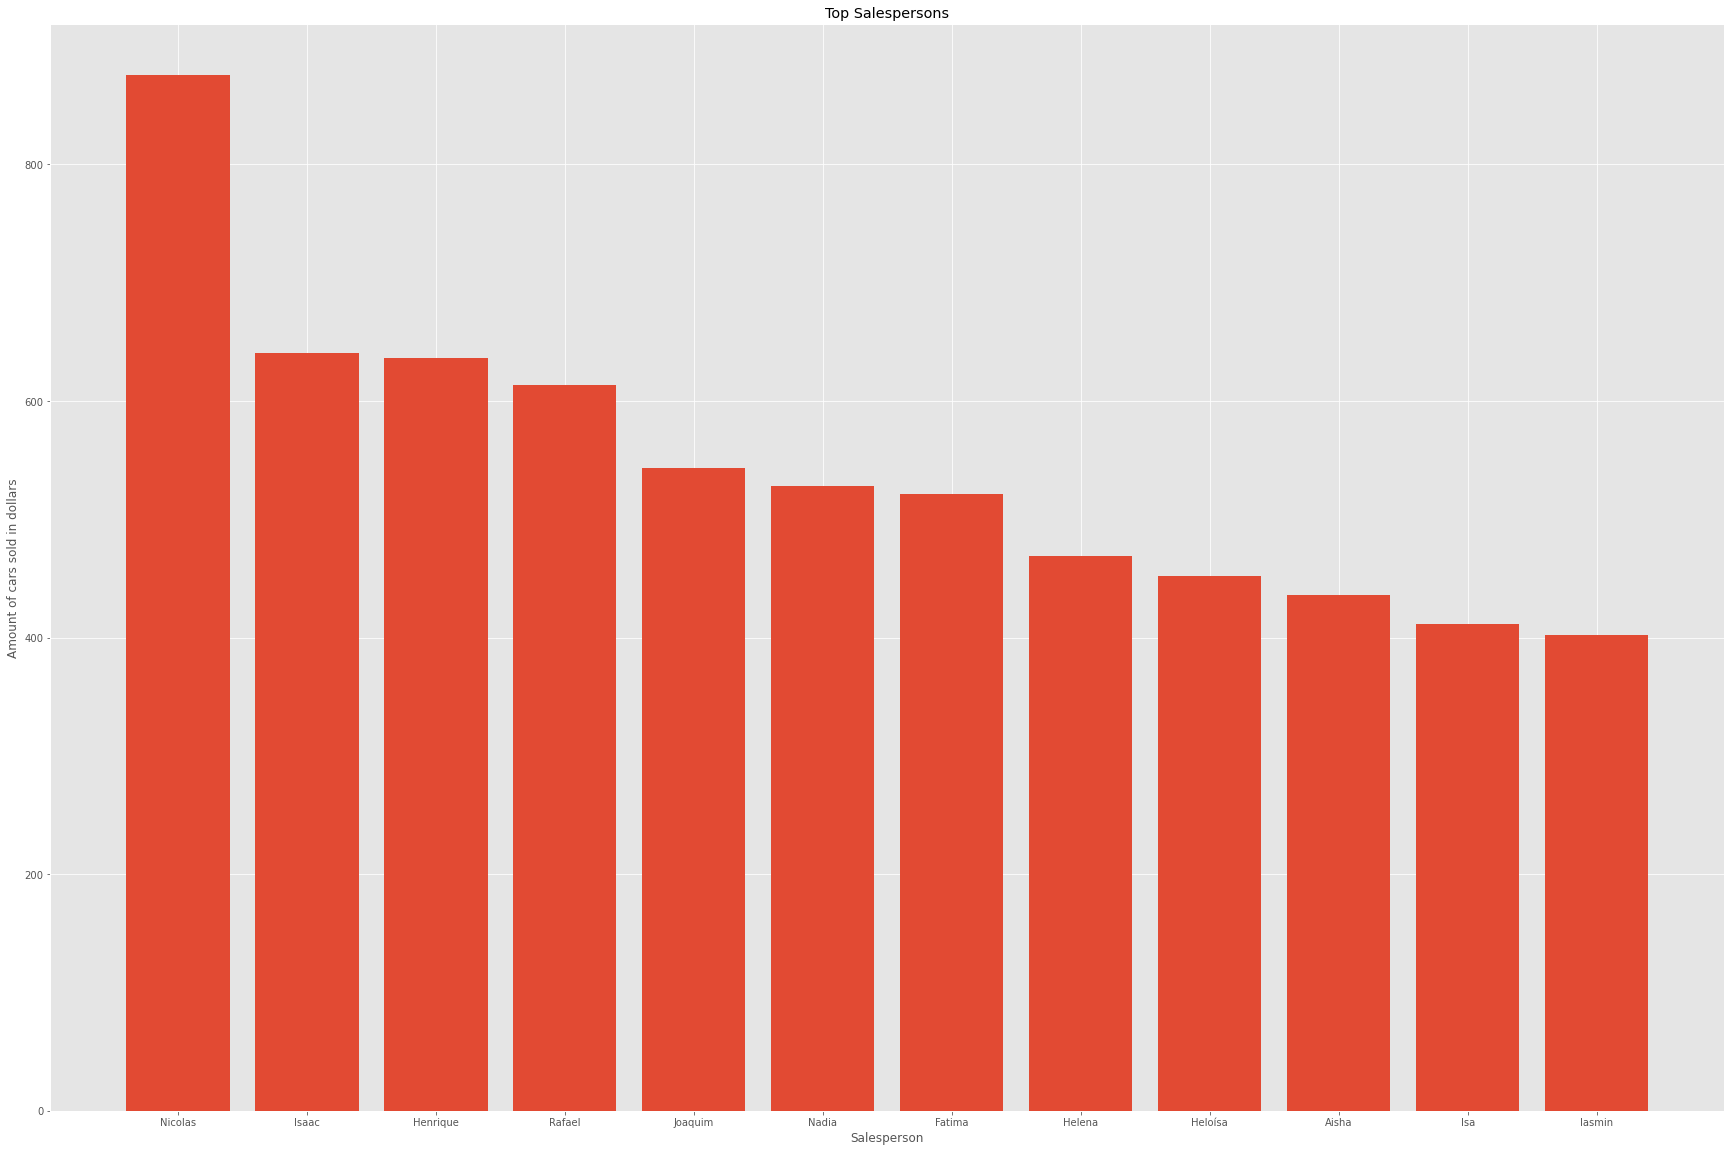

In [276]:
plt.bar(sales.index, sales.total_US)
plt.title('Top Salespersons')
plt.xlabel('Salesperson')
plt.ylabel('Amount of cars sold in dollars') 

plt.show()

I have a sneeking suspicion that not only the car brand reels in customers, but the colour of the model itself matters significantly. There are multiple ways of confirming this, but for practise sake, I prefer to utilize a pie chart in the end with the data collected in the same way as prior 

In [278]:
cp = color_preferences_df.sort_values('total_US', ascending = False)
cp

,total_US
car_color,
red,3021.285972
white,2950.633384
black,2918.496744
silver,2881.411260
blue,2874.356402
gold,2776.335893


For my sake, i understand that pie charts are supposed to add up to a 100. This provokes me to alter the set of readings i currently possess into percentages. Of course, they has to me logically and mathematically correct so perform the following the equation to get the ratios. 

In [283]:
cp3 = cp/cp.sum()
cp3

,total_US
car_color,
red,0.173413
white,0.169357
black,0.167513
silver,0.165384
blue,0.164979
gold,0.159353


Possessing the ratios, i need to convert the dataframe into an array to meet the requirements for ploting a pie chart. This is done as follows:

In [284]:
cp3_array = cp3.to_numpy(np.float64)
cp3_array

array([[0.17341269],
       [0.16935744],
       [0.1675129 ],
       [0.1653843 ],
       [0.16497937],
       [0.15935329]])

The array I have isn't one dimensional, but 6 Dimensional. To convert it into a 1 dimensional array, I use the flatten function and that looks like:

In [286]:
cp4 = cp3_array.flatten()
cp4

array([0.17341269, 0.16935744, 0.1675129 , 0.1653843 , 0.16497937,
       0.15935329])

With the array flattened and the variable defined, we can be begin to plot the set of values into a pie shape as follows:

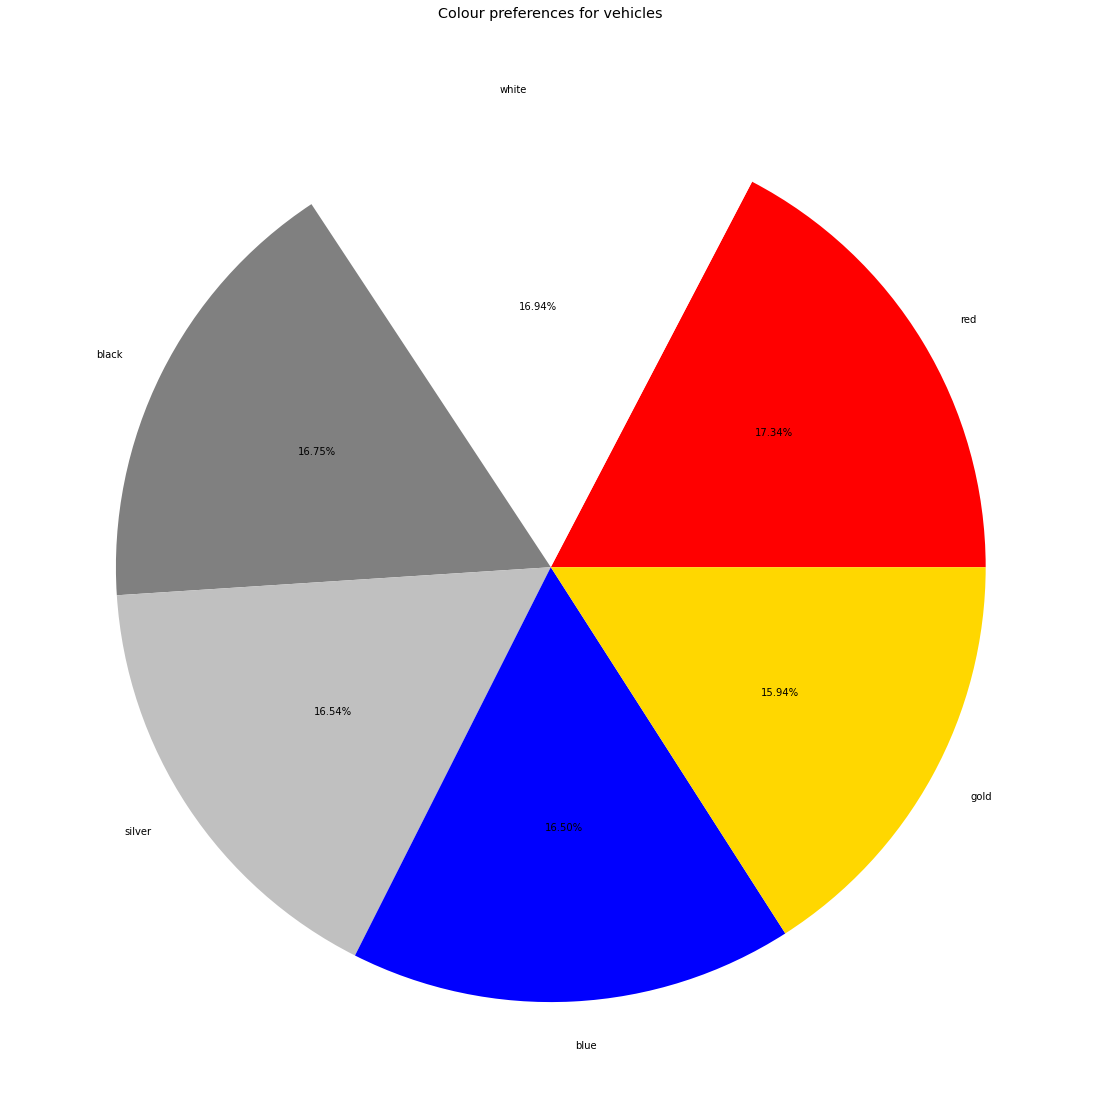

In [287]:
color_list = ['red', 'white', 'grey', 'silver', 'blue', 'gold']
labels = ['red', 'white', 'black', 'silver', 'blue', 'gold']
plt.title('Colour preferences for vehicles')
plt.pie(cp4, autopct = '%0.2f%%', colors = color_list, labels = labels);

Based on the set of values, it's safe to say that the colour doesn't hugely impact the choice of car when on the pursuit for six figures ranging automobiles. But this analysis doesn't suffice.

I can map out a heatmap and make it show a correlation that's a bit more informative and precise. How i go about it is as follows:
Firstly, correlations can only be drawn from numeric values. This means our dataset must me refined to convert word values like country names, colours, people's names etc into numbers. Presenting them as numbers essentially.



In [288]:
df_numerized = df
for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized

,id,date,car,seat_color,car_color,value_US,value_off_US,percent_discount,total_US,salesperson,city,country
0,1,18,4,1,1,2.315250,2.290760,3,2.222037,53,3,1
1,2,7,7,2,0,2.719500,2.686197,1,2.659335,53,3,1
2,3,3,4,0,4,2.205000,2.184845,1,2.162997,18,3,1
3,4,23,1,1,2,2.238075,2.211546,2,2.167315,53,3,1
4,5,1,2,0,5,13.351800,13.151793,1,13.020275,39,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3142,3143,839,7,3,2,3.764565,3.708973,2,3.634793,54,2,0
3143,3144,845,1,3,2,2.950605,2.917426,1,2.888252,11,2,0
3144,3145,850,1,1,1,3.037387,2.990502,2,2.930692,23,2,0
3145,3146,854,9,1,4,3.561075,3.519505,2,3.449115,54,2,0


All our values have been nummerized, granting the permission to form our matrix.

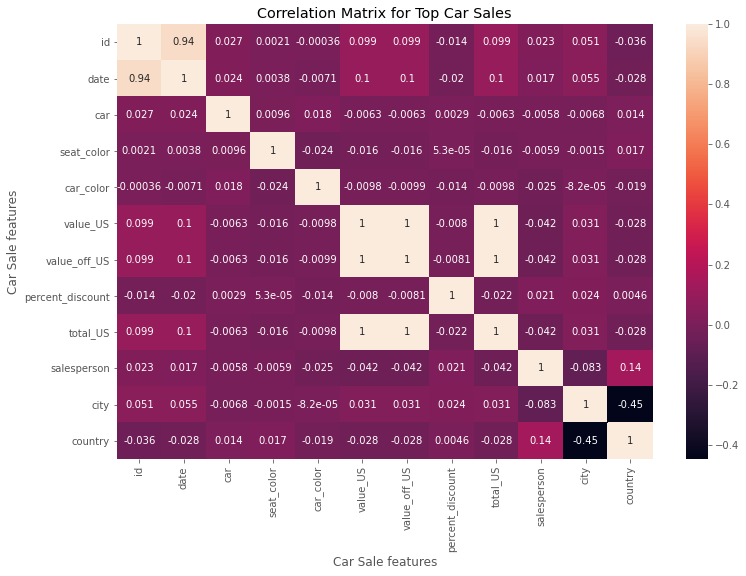

In [291]:
matplotlib.rcParams['figure.figsize'] = (12,8) # Adjusts the configuartion of the plots we will make

correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Top Car Sales')
plt.xlabel('Car Sale features')
plt.ylabel('Car Sale features')

plt.show()

The correlation matrix gives us all the possible correlations that can be made between two vehicle features. But for some this matrix is too much to digest. This why I can take it a step further and display the correlations through unstacking, sorting and setting limitations.

In [292]:
correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs

id       id                  1.000000
         date                0.941863
         car                 0.027390
         seat_color          0.002130
         car_color          -0.000355
                               ...   
country  percent_discount    0.004641
         total_US           -0.027653
         salesperson         0.140805
         city               -0.447473
         country             1.000000
Length: 144, dtype: float64

In [293]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

city         country       -0.447473
country      city          -0.447473
city         salesperson   -0.083203
salesperson  city          -0.083203
             total_US      -0.041966
                              ...   
seat_color   seat_color     1.000000
car          car            1.000000
date         date           1.000000
city         city           1.000000
country      country        1.000000
Length: 144, dtype: float64

In [294]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr

id                date                0.941863
date              id                  0.941863
value_US          total_US            0.999832
total_US          value_US            0.999832
                  value_off_US        0.999841
value_off_US      total_US            0.999841
value_US          value_off_US        0.999994
value_off_US      value_US            0.999994
id                id                  1.000000
salesperson       salesperson         1.000000
total_US          total_US            1.000000
percent_discount  percent_discount    1.000000
value_off_US      value_off_US        1.000000
value_US          value_US            1.000000
car_color         car_color           1.000000
seat_color        seat_color          1.000000
car               car                 1.000000
date              date                1.000000
city              city                1.000000
country           country             1.000000
dtype: float64

This further reinforces how car colour has minimal bearing on the selection process of vehicles when wealthy people go car shopping because there is no great correlation there.

We can also trim down the dataset to show the values purchases made over $10 Million.

In [29]:
high_purchases_df = df.total_US > 10

In [30]:
high_purchases_df

0       False
1       False
2       False
3       False
4        True
        ...  
3142    False
3143    False
3144    False
3145    False
3146    False
Name: total_US, Length: 3147, dtype: bool

In [38]:
df[high_purchases_df]

,id,date,car,seat_color,car_color,value_US,value_off_US,percent_discount,total_US,salesperson,city,country
4,5,2017-1-10,Bugatti La Voiture Noire,black,white,13.351800,13.151793,1,13.020275,Manuela,sao paulo,brazil
7,8,2017-1-18,Bugatti La Voiture Noire,brown,gold,14.431725,14.214280,0,14.214280,Heloísa,sao paulo,brazil
9,10,2017-1-4,Bugatti La Voiture Noire,black,white,13.351800,13.172322,0,13.172322,Laura,sao paulo,brazil
34,35,2017-1-1,Bugatti La Voiture Noire,white,red,14.019390,13.801530,2,13.525499,Henrique,lisboa,portugal
35,36,2017-1-14,Bugatti La Voiture Noire,brown,silver,14.431725,14.263385,1,14.120751,Henrique,lisboa,portugal
...,...,...,...,...,...,...,...,...,...,...,...,...
3128,3129,2020-10-14,Rolls-Royce Sweptail,brown,gold,13.406400,13.230192,2,12.965589,Akemi,tokio,japan
3133,3134,2020-10-21,Bugatti La Voiture Noire,black,blue,18.653250,18.470858,0,18.470858,Laila,riad,Saudi Arabia
3135,3136,2020-10-22,Rolls-Royce Sweptail,black,black,12.160000,11.994675,3,11.634835,Isa,riad,Saudi Arabia
3138,3139,2020-10-18,Bugatti La Voiture Noire,white,red,19.026315,18.824290,1,18.636047,Iasmin,riad,Saudi Arabia


In [40]:
from IPython.display import display
with pd.option_context('display.max_rows', 600):
    display(df[df.total_US > 10])

,id,date,car,seat_color,car_color,value_US,value_off_US,percent_discount,total_US,salesperson,city,country
4,5,2017-1-10,Bugatti La Voiture Noire,black,white,13.351800,13.151793,1,13.020275,Manuela,sao paulo,brazil
7,8,2017-1-18,Bugatti La Voiture Noire,brown,gold,14.431725,14.214280,0,14.214280,Heloísa,sao paulo,brazil
9,10,2017-1-4,Bugatti La Voiture Noire,black,white,13.351800,13.172322,0,13.172322,Laura,sao paulo,brazil
34,35,2017-1-1,Bugatti La Voiture Noire,white,red,14.019390,13.801530,2,13.525499,Henrique,lisboa,portugal
35,36,2017-1-14,Bugatti La Voiture Noire,brown,silver,14.431725,14.263385,1,14.120751,Henrique,lisboa,portugal
36,37,2017-1-6,Bugatti La Voiture Noire,white,white,13.618836,13.502326,2,13.232279,Isaac,lisboa,portugal
45,46,2017-1-8,Bugatti La Voiture Noire,red,blue,14.431725,14.242092,1,14.099671,Nicolas,lisboa,portugal
54,55,2017-1-9,Bugatti La Voiture Noire,white,gold,14.019390,13.820002,1,13.681802,Naomi,tokio,japan
56,57,2017-1-20,Bugatti La Voiture Noire,white,blue,14.019390,13.801538,3,13.387492,Akemi,tokio,japan
78,79,2017-1-4,Bugatti La Voiture Noire,red,white,14.019390,13.890407,2,13.612599,Fatima,riad,Saudi Arabia
